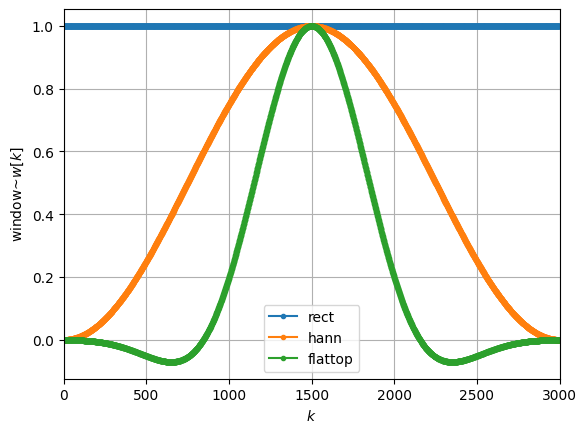

In [10]:
from scipy.signal.windows import hann, flattop
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift

# Define frequencies and sampling frequency based on the image data
f1 = 400  # Hz
f2 = 400.25  # Hz
f3 = 399.75  # Hz
fs = 600  # Hz
N = 3000  # Number of samples

# Generate signals
k = np.arange(N)
x1 = 3 * np.sin(2 * np.pi * f1 / fs * k)  # Amplitude adjusted to 3 as per image
x2 = 3 * np.sin(2 * np.pi * f2 / fs * k)
x3 = 3 * np.sin(2 * np.pi * f3 / fs * k)

# Define windows
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)

# Plot windows
plt.plot(wrect, 'C0o-', ms=3, label='rect')
plt.plot(whann, 'C1o-', ms=3, label='hann')
plt.plot(wflattop, 'C2o-', ms=3, label='flattop')
plt.xlabel(r'$k$')
plt.ylabel(r'window~$w[k]$')
plt.xlim(0, N)
plt.legend()
plt.grid(True)


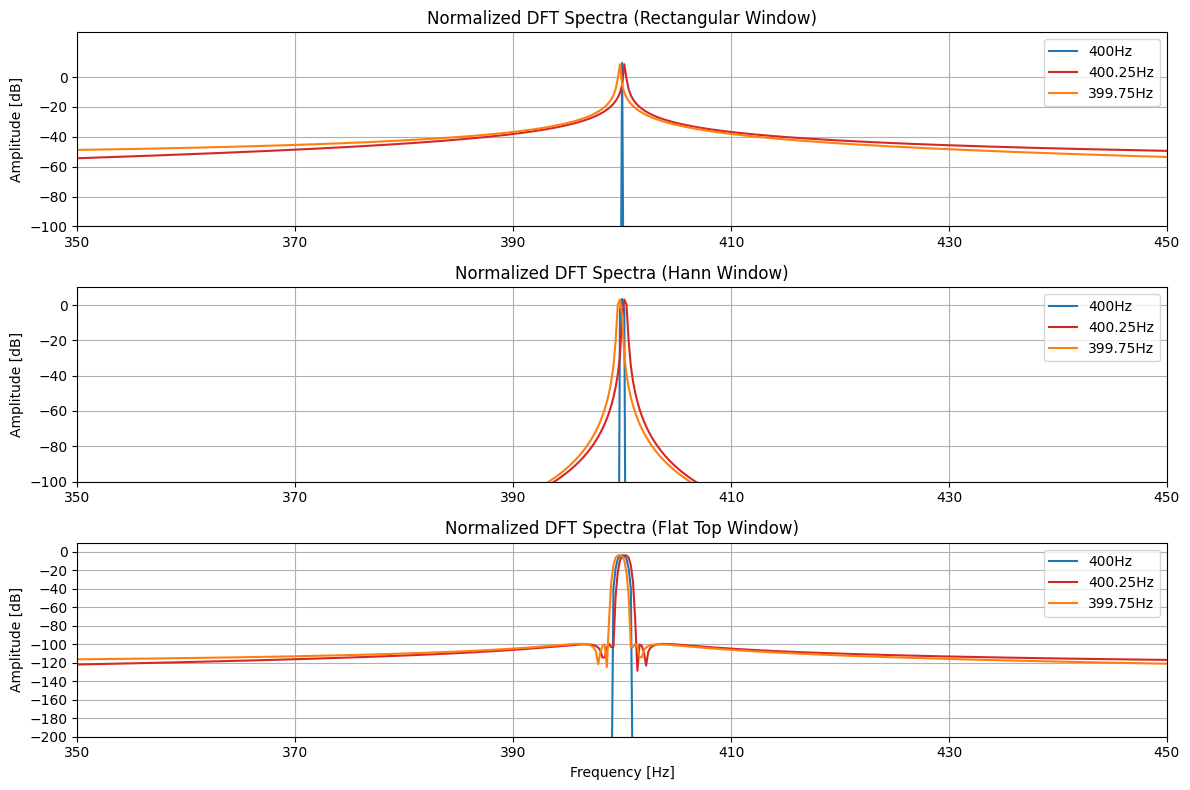

In [14]:
# Compute FFTs for signals with windows applied
X1wrect = fft(x1 * wrect)
X2wrect = fft(x2 * wrect)
X3wrect = fft(x3 * wrect)

X1whann = fft(x1 * whann)
X2whann = fft(x2 * whann)
X3whann = fft(x3 * whann)

X1wflattop = fft(x1 * wflattop)
X2wflattop = fft(x2 * wflattop)
X3wflattop = fft(x3 * wflattop)

# Function to compute normalized FFT spectrum in dB
def fft2db(X):
    N = X.size
    Xtmp = 2 / N * X
    Xtmp[0] *= 1 / 2
    if N % 2 == 0:
        Xtmp[N // 2] = Xtmp[N // 2] / 2
    return 20 * np.log10(np.abs(Xtmp))

# Frequency axis
df = fs / N
f = np.arange(N) * df

# Plot normalized DFT spectra with improved visuals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X1wrect), "C0-", lw=1.5, label="400Hz")
plt.plot(f, fft2db(X2wrect), "C3-", lw=1.5, label="400.25Hz")
plt.plot(f, fft2db(X3wrect), "C1-", lw=1.5, label="399.75Hz")
plt.xlim(350, 450)
plt.ylim(-100, 30)
plt.xticks(np.arange(350, 451, 20))
plt.yticks(np.arange(-100, 11, 20))
plt.title("Normalized DFT Spectra (Rectangular Window)")
plt.ylabel("Amplitude [dB]")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(f, fft2db(X1whann), "C0-", lw=1.5, label="400Hz")
plt.plot(f, fft2db(X2whann), "C3-", lw=1.5, label="400.25Hz")
plt.plot(f, fft2db(X3whann), "C1-", lw=1.5, label="399.75Hz")
plt.xlim(350, 450)
plt.ylim(-100, 10)
plt.xticks(np.arange(350, 451, 20))
plt.yticks(np.arange(-100, 11, 20))
plt.title("Normalized DFT Spectra (Hann Window)")
plt.ylabel("Amplitude [dB]")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X1wflattop), "C0-", lw=1.5, label="400Hz")
plt.plot(f, fft2db(X2wflattop), "C3-", lw=1.5, label="400.25Hz")
plt.plot(f, fft2db(X3wflattop), "C1-", lw=1.5, label="399.75Hz")
plt.xlim(350, 450)
plt.ylim(-100, 10)
plt.xticks(np.arange(350, 451, 20))
plt.yticks(np.arange(-200, 11, 20))
plt.title("Normalized DFT Spectra (Flat Top Window)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [dB]")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()